In [24]:
import sys
sys.path.append("..")
from geomatry.opt.scipy_optimizer import MultiSystemOptimizer
from geomatry.opt_Energy_approximated.optimizer import MultipleSystemOptimizer as MultiSystemOptimizer_Energy
from geomatry.opt.loss import rmsd_loss
from geomatry.ff.graph import get_given_graph_builder
from geomatry.ff.LennardJones import LennardJonesFF, _random_lj_systems, _random_lj_ff_param
import torch
import copy

systemN = 15
N = 15
N_pairs = 105
max_Za = 2
Ras, Zas, idx_is, idx_js = _random_lj_systems(systemN, N, N_pairs, max_Za, start_Za=1)
k, r0 = _random_lj_ff_param(max_Za, r0_max=5, k_max=5)
ff = LennardJonesFF(max_Za)
ff.reset_parameters(k, r0)

fixed_atom_indices = [0]
graph_builders = [get_given_graph_builder(idx_i, idx_j) for idx_i, idx_j in zip(idx_is, idx_js)]

# start implicit optimization
params_star = ff.state_dict()
params_goal = copy.deepcopy(params_star)
print("params_star", params_star)
optimizer = MultiSystemOptimizer(
    Ras, Zas, graph_builders, ff, rmsd_loss, 
    params_star=params_star,
    fixed_atom_indices=fixed_atom_indices,
    fmax=1e-5
)

optimizer_Energy = MultiSystemOptimizer_Energy(
    optimizer.Ra_stars, Zas, graph_builders, ff, rmsd_loss, 
    params_star=params_star,
    fixed_atom_indices=fixed_atom_indices,
    fmax=1e-5, reoptimize=False
)

optimizer.fixed_atom_indices=[0,1,2]
optimizer_Energy.fixed_atom_indices=[0,1,2]

k_perturbed = torch.clamp(k.clone() + 0.5 * torch.randn_like(k), min=0)
r0_perturbed = torch.clamp(r0.clone() + 0.5 * torch.randn_like(r0), min=0)

ff.reset_parameters(k_perturbed, r0_perturbed)
params_0 = ff.state_dict()
params_0_old = copy.deepcopy(params_0)

params_star OrderedDict([('k', tensor([[3.6338, 2.2225, 1.5537],
        [2.2225, 1.6479, 1.5043],
        [1.5537, 1.5043, 1.9315]], dtype=torch.float64)), ('r0', tensor([[0.4066, 3.9020, 0.7621],
        [3.9020, 1.3829, 3.6421],
        [0.7621, 3.6421, 2.8535]], dtype=torch.float64))])


In [27]:
params_0=copy.deepcopy(params_0_old)
new_params_0=optimizer.optimize_Adam(2000,params_0)
print("params_optimized",new_params_0)

/Users/soonhyun/Desktop/GeometryOptimization/Landscape_Fork/GeoMatry_LandscapeBased/GeoMatry_LandscapeBased/demo/../geomatry/opt/scipy_optimizer.py:139: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  params = nn.Parameter(torch.tensor(initial_params_flat, dtype=torch.float32))
  5%|▌         | 100/2000 [01:45<34:35,  1.09s/it]

Step 100/2000, Loss: 8.087959


 10%|█         | 200/2000 [03:26<24:49,  1.21it/s]

Step 200/2000, Loss: 4.720969


 15%|█▌        | 300/2000 [04:54<23:59,  1.18it/s]

Step 300/2000, Loss: 4.492759


 20%|██        | 400/2000 [06:12<19:59,  1.33it/s]

Step 400/2000, Loss: 4.249723


 25%|██▌       | 500/2000 [07:29<20:19,  1.23it/s]

Step 500/2000, Loss: 3.780801


 30%|███       | 600/2000 [08:46<16:43,  1.40it/s]

Step 600/2000, Loss: 2.642273


 35%|███▌      | 700/2000 [09:56<14:17,  1.52it/s]

Step 700/2000, Loss: 1.792656


 40%|████      | 800/2000 [11:02<11:57,  1.67it/s]

Step 800/2000, Loss: 0.797489


 45%|████▌     | 900/2000 [12:03<10:56,  1.68it/s]

Step 900/2000, Loss: 0.919347


 50%|█████     | 1000/2000 [13:04<09:18,  1.79it/s]

Step 1000/2000, Loss: 0.820400


 55%|█████▌    | 1100/2000 [13:58<07:28,  2.00it/s]

Step 1100/2000, Loss: 0.751502


 60%|██████    | 1200/2000 [14:37<04:39,  2.87it/s]

Step 1200/2000, Loss: 0.727588


 65%|██████▌   | 1300/2000 [15:12<03:48,  3.06it/s]

Step 1300/2000, Loss: 0.000847


 70%|███████   | 1400/2000 [15:45<03:13,  3.11it/s]

Step 1400/2000, Loss: 0.724758


 75%|███████▌  | 1500/2000 [16:18<02:57,  2.81it/s]

Step 1500/2000, Loss: 0.729821


 80%|████████  | 1600/2000 [16:52<02:23,  2.79it/s]

Step 1600/2000, Loss: 0.727926


 85%|████████▌ | 1700/2000 [17:26<01:39,  3.01it/s]

Step 1700/2000, Loss: 0.724848


 90%|█████████ | 1800/2000 [17:59<01:04,  3.08it/s]

Step 1800/2000, Loss: 0.000209


 90%|█████████ | 1808/2000 [18:02<01:54,  1.67it/s]

Step 1809/2000, Loss: 0.000051
params_optimized OrderedDict([('k', tensor([[4.6862, 2.3709, 1.9389],
        [2.3709, 1.8561, 1.6933],
        [1.9389, 1.6943, 2.1754]], dtype=torch.float64,
       grad_fn=<ViewBackward0>)), ('r0', tensor([[0.6250, 3.5519, 1.2912],
        [3.5519, 1.3828, 3.6428],
        [1.2912, 3.6414, 2.8535]], dtype=torch.float64,
       grad_fn=<ViewBackward0>))])


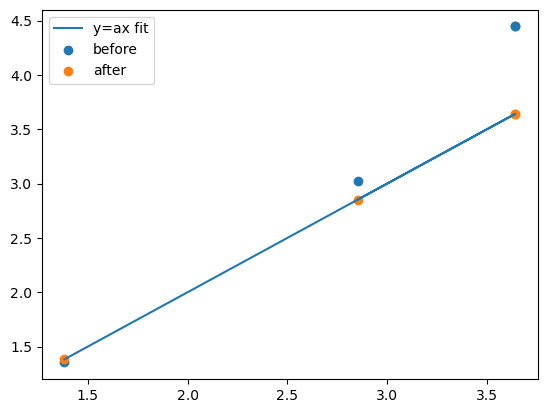

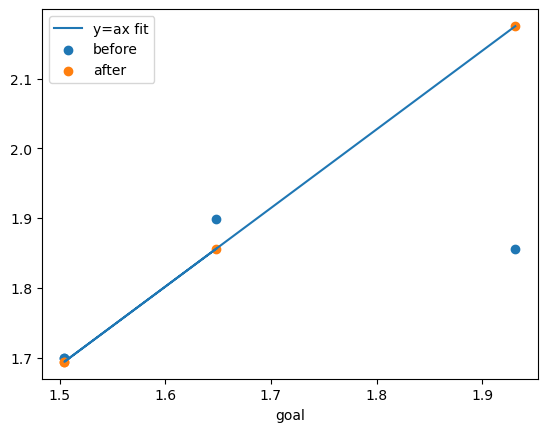

In [28]:
#Compare
import matplotlib.pyplot as plt

new_params_0['k']=(new_params_0['k']+new_params_0['k'].T)/2
params_goal['k']=(params_goal['k']+params_goal['k'].T)/2
params_0_old['k']=(params_0_old['k']+params_0_old['k'].T)/2

for key in params_goal.keys():
    params_goal[key]=params_goal[key].detach()

for key in new_params_0.keys():
    new_params_0[key]=new_params_0[key].detach()


for key in new_params_0.keys():
    new_params_0[key]=new_params_0[key].detach()

a=torch.sum(new_params_0['r0'][1:,1:].reshape(-1))/torch.sum(params_star['r0'][1:,1:].reshape(-1))
plt.plot(params_star['r0'][1:,1:].reshape(-1),a*params_star['r0'][1:,1:].reshape(-1),label='y=ax fit')
plt.scatter(params_star['r0'][1:,1:].reshape(-1),params_0_old['r0'][1:,1:].reshape(-1),label='before')
plt.scatter(params_star['r0'][1:,1:].reshape(-1),new_params_0['r0'][1:,1:].reshape(-1),label='after')
plt.legend()
plt.show()

a=torch.sum(new_params_0['k'][1:,1:].reshape(-1))/torch.sum(params_goal['k'][1:,1:].reshape(-1))
plt.plot(params_goal['k'][1:,1:].reshape(-1),a*params_goal['k'][1:,1:].reshape(-1),label='y=ax fit')
plt.scatter(params_goal['k'][1:,1:].reshape(-1),params_0_old['k'][1:,1:].reshape(-1),label='before')
plt.scatter(params_goal['k'][1:,1:].reshape(-1),new_params_0['k'][1:,1:].reshape(-1),label='after')
plt.xlabel('goal')
plt.legend()
plt.show()

params_0 OrderedDict([('k', tensor([[4.6862, 2.3709, 1.9389],
        [2.3709, 1.8981, 1.6994],
        [1.9389, 1.6994, 1.8558]], dtype=torch.float64)), ('r0', tensor([[0.6250, 3.5519, 1.2912],
        [3.5519, 1.3538, 4.4459],
        [1.2912, 4.4459, 3.0230]], dtype=torch.float64))])


  0%|          | 0/8001 [00:00<?, ?it/s, loss=7890.5895]

0 curvature tensor(312.5950, dtype=torch.float64, grad_fn=<DivBackward0>) 1180.3333169090922 distance 1.3741569234505944 loss 7890.589536045305
trueloss 7890.589536045305
loss 7890.589536045305
tensor([-40.6118, -32.0492, -35.3720, -42.5605, -46.2552, -44.5183],
       dtype=torch.float64, grad_fn=<SubBackward0>)


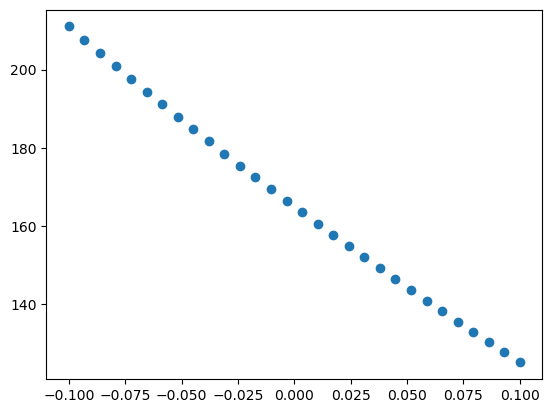

 50%|████▉     | 3999/8001 [03:37<03:21, 19.90it/s, loss=1.4519]  

4000 curvature tensor(165.5074, dtype=torch.float64, grad_fn=<DivBackward0>) 0.1981782556266535 distance 0.017519803410271224 loss 1.4518845928699016
trueloss 1.4518845928699016
loss 1.4518845928699016
tensor([1.4802, 0.3765, 0.6378, 0.3518, 0.3522, 0.7464], dtype=torch.float64,
       grad_fn=<SubBackward0>)


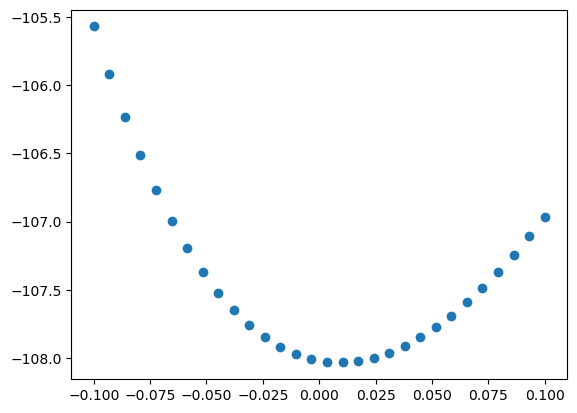

100%|█████████▉| 7999/8001 [07:18<00:00, 18.88it/s, loss=0.0468]

8000 curvature tensor(42.3178, dtype=torch.float64, grad_fn=<DivBackward0>) 0.0002506209373592405 distance 0.0019074516172050456 loss 0.04683743444946024
trueloss 0.04683743444946024
loss 0.04683743444946024
tensor([0.6522, 0.2438, 0.7288, 0.2911, 0.4054, 0.2126], dtype=torch.float64,
       grad_fn=<SubBackward0>)


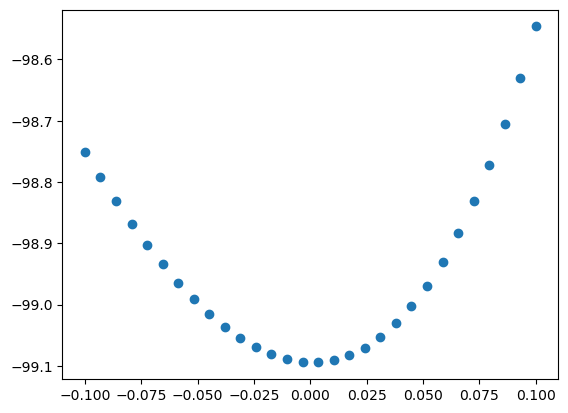

100%|██████████| 8001/8001 [07:18<00:00, 18.25it/s, loss=0.0468]


In [37]:
def energyAndRsquare(k_perturbed, r0_perturbed, optimizer):
    ff.reset_parameters(k_perturbed, r0_perturbed)
    params_0 = ff.state_dict()
    print("params_0", params_0)
    for i in range(1):
        params_0=optimizer.optimize(params_0, 8001, 4000, 0.02, 6, 2)
    return params_0
new_params_0_Energy=energyAndRsquare(k_perturbed, r0_perturbed, optimizer_Energy)


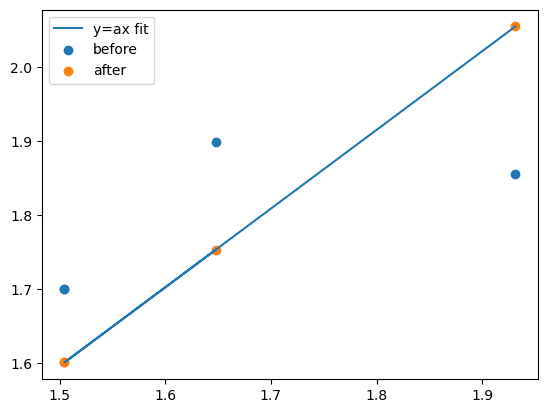

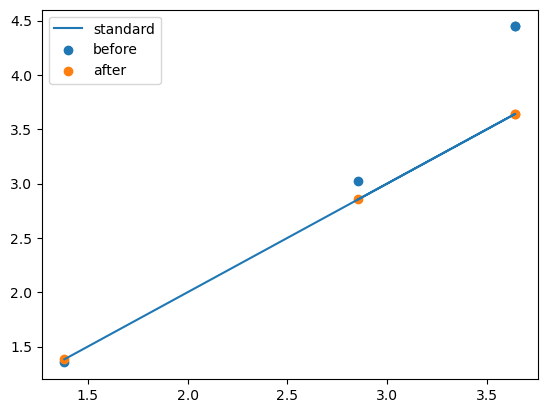

In [38]:
#Confirm
import matplotlib.pyplot as plt

new_params_0_Energy['k']=(new_params_0_Energy['k']+new_params_0_Energy['k'].T)/2
params_star['k']=(params_star['k']+params_star['k'].T)/2
params_0_old['k']=(params_0_old['k']+params_0_old['k'].T)/2

a=torch.sum(new_params_0_Energy['k'][1:,1:].reshape(-1))/torch.sum(params_star['k'][1:,1:].reshape(-1))
plt.plot(params_star['k'][1:,1:].reshape(-1),a*params_star['k'][1:,1:].reshape(-1),label='y=ax fit')
plt.scatter(params_star['k'][1:,1:].reshape(-1),params_0_old['k'][1:,1:].reshape(-1),label='before')
plt.scatter(params_star['k'][1:,1:].reshape(-1),new_params_0_Energy['k'][1:,1:].reshape(-1),label='after')
plt.legend()
plt.show()

#Compare
import matplotlib.pyplot as plt

plt.plot(params_star['r0'][1:,1:].reshape(-1),params_star['r0'][1:,1:].reshape(-1),label='standard')
plt.scatter(params_star['r0'][1:,1:].reshape(-1),params_0_old['r0'][1:,1:].reshape(-1),label='before')
plt.scatter(params_star['r0'][1:,1:].reshape(-1),new_params_0_Energy['r0'][1:,1:].reshape(-1),label='after')
plt.legend()
plt.show()